In [11]:
import ee
import geemap
import rasterio as rio
from rasterio.plot import show
import os
import time
from IPython.display import Image
from pylandstats import Landscape
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [2]:
# Authenticate and initialize Earth Engine
!earthengine authenticate --force

# Specify your Earth Engine project ID
project_id = 'musa650-final-sk-rg'

# Initialize Earth Engine with your project ID
ee.Initialize(project=project_id)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=http%3A%2F%2Flocalhost%3A8085&response_type=code&code_challenge=2sT9ZE_eympZuk8Jv9nm8au_fWA1kVMouPFROQjJGbY&code_challenge_method=S256

Waiting for successful authorization from web browser ...

Successfully saved authorization token.


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Open the file and get a file "handle"
raster1 = rio.open("D:/2015-2023/December 2015/L15-1549E-1180N.tif")

raster1

<open DatasetReader name='D:/2015-2023/December 2015/L15-1549E-1180N.tif' mode='r'>

In [5]:
raster1.crs

CRS.from_epsg(3857)

In [6]:
raster1.bounds

BoundingBox(left=10273136.600107122, bottom=3052589.1611790857, right=10292704.47934541, top=3072157.040417373)

In [7]:
raster1.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4096,
 'height': 4096,
 'count': 4,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(4.77731426716, 0.0, 10273136.600107122,
        0.0, -4.77731426716, 3072157.040417373)}

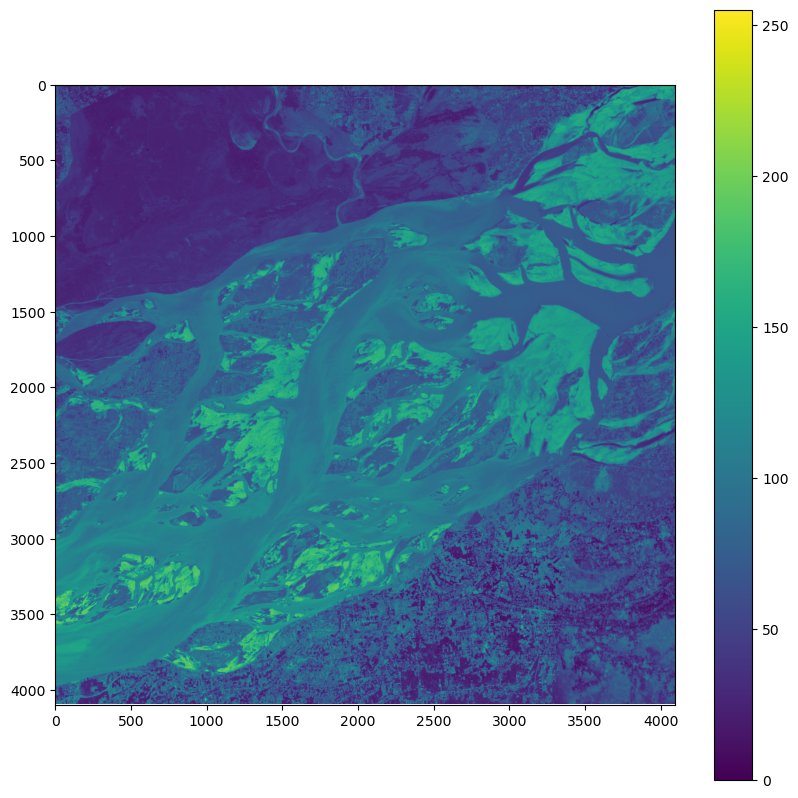

In [15]:
# Open the raster image
with rio.open('D:/2015-2023/December 2015/L15-1549E-1180N.tif') as src:
    raster_array = src.read(1)  # Read the first band of the raster

# Display the raster image
fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(raster_array)  # Adjust the colormap as needed
plt.colorbar(img)
plt.show()

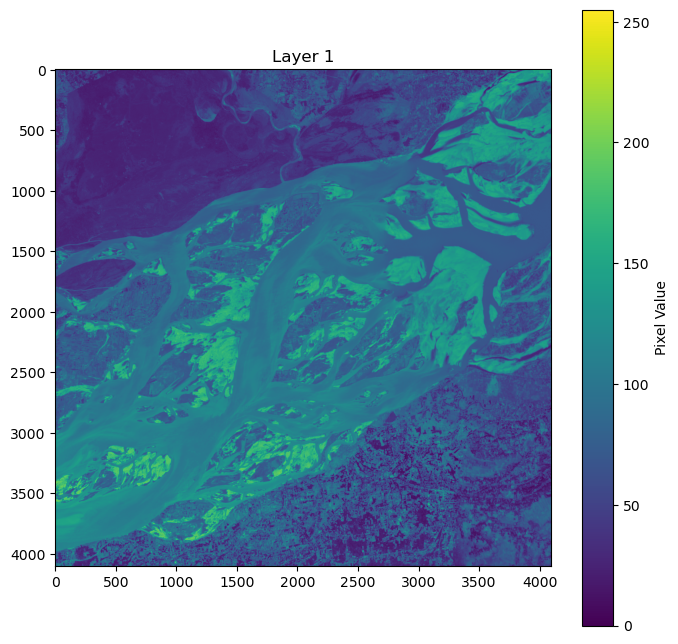

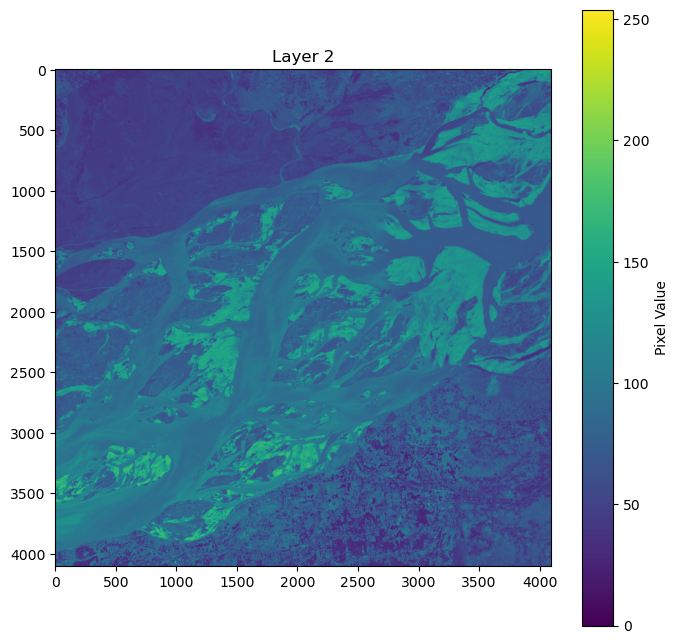

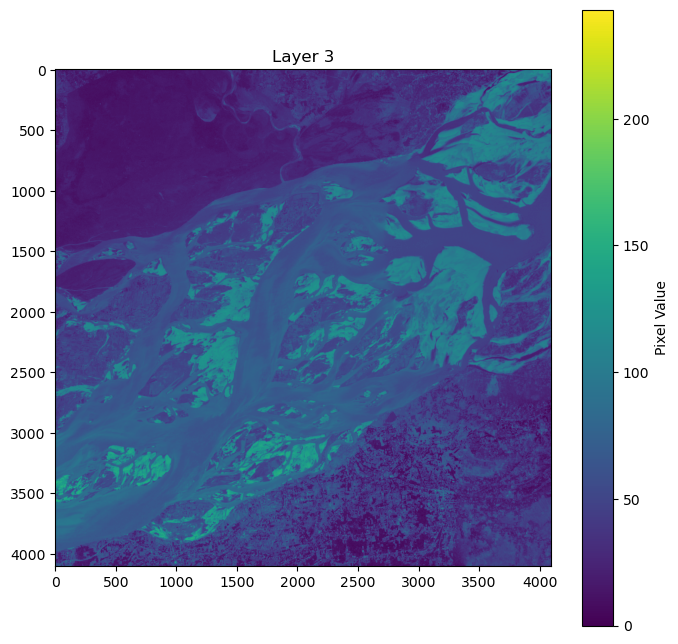

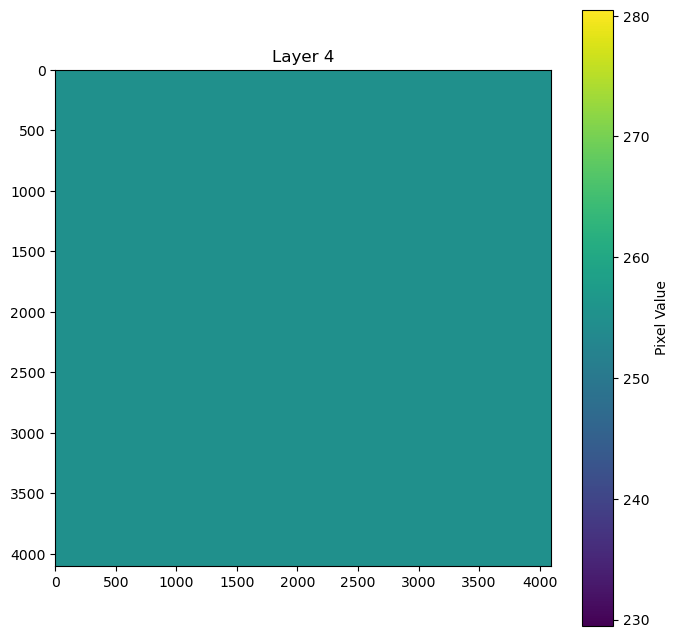

In [18]:
# Open the TIFF file
with rio.open('D:/2015-2023/December 2015/L15-1549E-1180N.tif') as src:
    # Get the number of bands (layers) in the TIFF file
    num_bands = src.count
    
    # Iterate over each band (layer) in the TIFF file
    for i in range(1, num_bands + 1):
        # Read the band data
        band_data = src.read(i)
        
        # Visualize the band data
        plt.figure(figsize=(8, 8))
        plt.imshow(band_data, cmap='viridis')  # Use cmap='gray' for grayscale images
        plt.title(f"Layer {i}")
        plt.colorbar(label='Pixel Value')
        plt.show()

In [26]:
# Example usage:
data_2015_1 = rio.open('D:/2015-2023/December 2015/L15-1549E-1180N.tif')
data_2015_2 = rio.open('D:/2015-2023/December 2015/L15-1549E-1181N.tif')


In [28]:
data_2015_1.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4096,
 'height': 4096,
 'count': 4,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(4.77731426716, 0.0, 10273136.600107122,
        0.0, -4.77731426716, 3072157.040417373)}

In [29]:
data_2015_2.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4096,
 'height': 4096,
 'count': 4,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(4.77731426716, 0.0, 10273136.600107122,
        0.0, -4.77731426716, 3091724.919655662)}

In [46]:
def load_raster(file_path):
    """
    Function to load raster data from a GeoTIFF file.
    
    Parameters:
    file_path (str): Path to the GeoTIFF file.
    
    Returns:
    numpy.ndarray: A 2D numpy array representing the raster data.
    """
    with rasterio.open(file_path) as src:
        raster_data = src.read(1)  # Read only the first band
    return raster_data

def extract_band_features(data):
    """
    Function to extract statistical features from a single band of raster data.
    
    Parameters:
    data (numpy.ndarray): Input raster data with shape (height, width).
    
    Returns:
    numpy.ndarray: Feature vector containing statistical features for the band.
    """
    band_features = [
        np.mean(data),            # Mean
        np.std(data),             # Standard Deviation
    ]
    return np.array(band_features)

# Load raster data from file
file_path = 'D:/2015-2023/December 2015/L15-1549E-1180N.tif'  # Replace with the actual file path
raster_data = load_raster(file_path)

# Extract features from the first band
features_1 = extract_band_features(raster_data)

print("Extracted features from the first band:", features_1)


Extracted features from the first band: [81.28352249 38.09740687]


In [47]:
# Load raster data from file
file_path = 'D:/2015-2023/December 2015/L15-1549E-1181N.tif'  # Replace with the actual file path
raster_data = load_raster(file_path)

# Extract features from each band
features_2 = extract_band_features(raster_data)

print("Extracted features:", features_2)

Extracted features: [57.498074   23.46730271]


In [49]:
# Reshape the arrays to have a second dimension
features_1_reshaped = features_1.reshape(-1, 1)
features_2_reshaped = features_2.reshape(-1, 1)

# Concatenate the arrays along axis 1
combined_array = np.concatenate((features_1_reshaped, features_2_reshaped), axis=1)

print("Combined Array:")
print(combined_array)

Combined Array:
[[81.28352249 57.498074  ]
 [38.09740687 23.46730271]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)


In [39]:
model.fit([features_1, features_2], labels)

NameError: name 'labels' is not defined